In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
simu_out = pd.read_csv('../sample_output/simu_0.csv')

In [3]:
simu_out

,day,cbg,susceptible,infectious,recovered
0,1,480850311005,2074,1,0
1,1,550870116004,2401,1,0
2,1,230050173032,2832,1,0
3,1,230050020022,680,2,0
4,1,191810203003,1823,1,0
...,...,...,...,...,...
447608,90,250158214004,1976,1,0
447609,90,291094705004,691,1,0
447610,90,371910003031,4213,3,2
447611,90,250214101002,3613,3,11


In [4]:
import geopandas as gpd

In [5]:
county_df = gpd.read_file("../src_data/us_county/us_county.shp")

In [6]:
county_df

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01029,01,029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873..."
1,01031,01,031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619..."
2,01037,01,037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090..."
3,01039,01,039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994..."
4,01041,01,041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68046, -86.14711 31.663..."
...,...,...,...,...,...,...,...
3216,72131,72,131,San Sebastián,Muno,70.423,"POLYGON ((-66.90748 18.25314, -66.90739 18.253..."
3217,72133,72,133,Santa Isabel,Muno,34.023,"POLYGON ((-66.37968 17.94398, -66.38029 17.943..."
3218,72137,72,137,Toa Baja,Muno,23.241,"MULTIPOLYGON (((-66.13957 18.46232, -66.13956 ..."
3219,72139,72,139,Trujillo Alto,Muno,20.764,"POLYGON ((-66.02917 18.3759, -66.02828 18.3768..."


In [8]:
simu_out['county'] = simu_out['cbg'].apply(lambda x: str(x)[:5])
simu_out

,day,cbg,susceptible,infectious,recovered,county
0,1,480850311005,2074,1,0,48085
1,1,550870116004,2401,1,0,55087
2,1,230050173032,2832,1,0,23005
3,1,230050020022,680,2,0,23005
4,1,191810203003,1823,1,0,19181
...,...,...,...,...,...,...
447608,90,250158214004,1976,1,0,25015
447609,90,291094705004,691,1,0,29109
447610,90,371910003031,4213,3,2,37191
447611,90,250214101002,3613,3,11,25021


In [96]:
def plot_day(day,vmax=100):
    simu_day = simu_out[simu_out['day'] <=day].groupby('county')[['infectious', 'recovered']].sum()
    gdf_join = county_df.merge(simu_day, left_on='GEO_ID', right_on='county', how = 'left')
    gdf_join = gdf_join.fillna(0)

    fig, ax = plt.subplots(1,figsize = (8,8))
    gdf_join.plot(column='infectious', cmap='Blues', linewidth=0.1, ax=ax, edgecolor='black', legend=False,  vmin = 0, vmax = vmax)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    new_xlim = [xlim[0],  xlim[0]+150]
    ax.set_xlim(new_xlim)

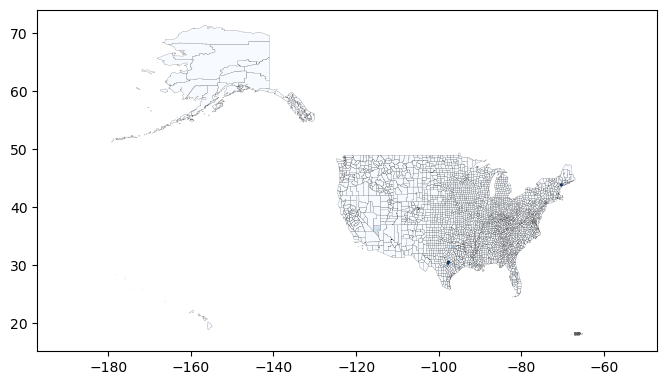

In [97]:
plot_day(5,5)

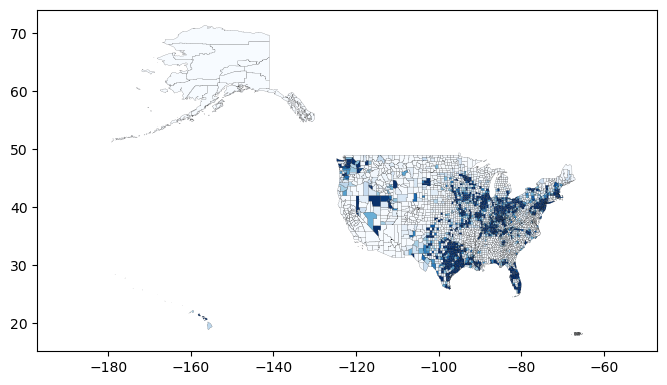

In [98]:
plot_day(90)